In [54]:
import h5py
import numpy as np
from buildGraph import *

In [19]:
import buildGraph
import imp
imp.reload(buildGraph)

In [55]:
file_ = '../../../data/processed/Nov_internet_data_t10_s100100.h5'
f = h5py.File(file_,'r')
data = f['data'].value
data = np.vstack(data)

In [56]:
data.shape

(4320, 100, 100)

In [57]:
data_4070 = data[:3240,40:70,40:70]

In [58]:
data_4070.shape

(3240, 30, 30)

In [60]:
interval = 1080

In [61]:
def cal_period_average(data, period = 1080):
    shape = [period]+list(data.shape[1:])
    s = np.zeros(shape)
    total_period = data.shape[0]
    for i in range(0, total_period, period):
        s += data[i:i+period,]
    step = total_period // period
    s /= step
    return s

In [62]:
test = [[[11,11,11],[22,22,22],[33,33,33]],[[11,11,11],[22,22,22],[33,33,33]],[[11,11,11],[22,22,22],[33,33,33]]]
test = np.array(test)
cal_period_average(test,1)

array([[[11., 11., 11.],
        [22., 22., 22.],
        [33., 33., 33.]]])

In [63]:
data_4070_weekly = cal_period_average(data_4070,1080)

In [65]:
data_4070_weekly.shape

(1080, 30, 30)

In [ ]:
dis,wei = buildGraph.build(data_4070_weekly,'lb')
#np.save('dis_matrix_lb_weekly_{}.npy'.format(4070), dis)

In [67]:
wei = np.load('wight_matrix_lb_weekly_4070.npy')

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
dis = np.load('dis_matrix_lb_weekly_4070.npy')

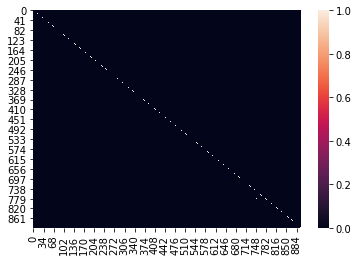

In [70]:
sns.heatmap(np.exp(-np.square(dis)))

In [52]:
#generate grids numbers
i = list(range(1,10001))
ii = np.array((i)).reshape(100,100)[40:70,40:70]
grids = ii.reshape(-1).tolist()
g = [str(i) for i in grids]
print(','.join(g))

4041,4042,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161,4162,4163,4164,4165,4166,4167,4168,4169,4170,4241,4242,4243,4244,4245,4246,4247,4248,4249,4250,4251,4252,4253,4254,4255,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269,4270,4341,4342,4343,4344,4345,4346,4347,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4441,4442,4443,4444,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458,4459,4460,4461,4462,4463,4464,4465,4466,4467,4468,4469,4470,4541,4542,4543,4544,4545,4546,4547,4548,4549,4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562,4563,4564,4565,4566,4567,4568,4569,4570,4641,4642,4643,4644,4645,4646,4647,4648,4649,4650,4651,4652,4653,4654,4655,4656,4657,4658,4659,4660,

In [72]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [73]:
x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


In [79]:
g = data_4070_weekly.reshape(-1,900).transpose()

In [93]:
distance, path = fastdtw(g[0], g[1], radius = 6)
print(distance)

5623.0202587381855


/home/hyf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  """Entry point for launching an IPython kernel.


In [92]:
distance, path = fastdtw(g[0], g[-1], radius = 6)
print(distance)

123469.84475698644


/home/hyf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  """Entry point for launching an IPython kernel.


In [107]:
dis

array([[   0.        ,  196.64301163,  210.70946629, ..., 2649.93247907,
        2992.66800543, 3011.33641215],
       [ 196.64301163,    0.        ,  124.42002114, ..., 2643.67710218,
        2994.76863108, 3014.78209103],
       [ 210.70946629,  124.42002114,    0.        , ..., 2439.18029103,
        2790.12388453, 2807.91204766],
       ...,
       [2649.93247907, 2643.67710218, 2439.18029103, ...,    0.        ,
         205.21723172,  215.00634124],
       [2992.66800543, 2994.76863108, 2790.12388453, ...,  205.21723172,
           0.        ,   16.94483537],
       [3011.33641215, 3014.78209103, 2807.91204766, ...,  215.00634124,
          16.94483537,    0.        ]])

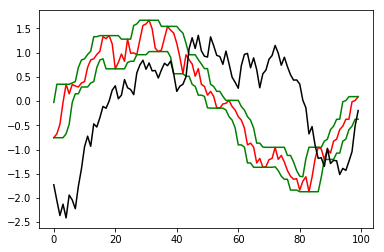

LB_Keogh similarity:  10.321066157946282


In [95]:
import numpy
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

plt.figure()

envelope_down, envelope_up = metrics.lb_envelope(dataset_scaled[0], radius=3)
plt.plot(numpy.arange(sz), dataset_scaled[0, :, 0], "r-")
plt.plot(numpy.arange(sz), envelope_down[:, 0], "g-")
plt.plot(numpy.arange(sz), envelope_up[:, 0], "g-")
plt.plot(numpy.arange(sz), dataset_scaled[1, :, 0], "k-")

plt.show()

print("LB_Keogh similarity: ", metrics.lb_keogh(dataset_scaled[1],
                                                envelope_candidate=(envelope_down, envelope_up)))

In [131]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(g)


In [132]:
dataset_scaled.shape

(900, 1080, 1)

In [134]:
lb_matrix = np.zeros((900,900))
for i in range(900):
    for j in range(900):
        envelope_down, envelope_up = metrics.lb_envelope(dataset_scaled[i,], radius=3)
        sim = metrics.lb_keogh(dataset_scaled[j,],envelope_candidate=(envelope_down, envelope_up))
        lb_matrix[i][j] = sim
np.save('lb_matrix.npy', lb_matrix)

In [139]:
a = np.load('lb_matrix.npy')
a[34][1]

24.477653954584063

In [141]:
a

array([[ 0.        , 12.15713411, 12.97075123, ..., 25.06327508,
        27.25716852, 27.00437599],
       [11.56354438,  0.        , 11.77713364, ..., 15.94155084,
        20.48128851, 20.2541661 ],
       [13.87103378, 11.42001184,  0.        , ..., 22.46521969,
        25.80179011, 25.41701338],
       ...,
       [22.74522784, 15.4492651 , 19.57883166, ...,  0.        ,
         7.97086907,  8.11501432],
       [20.01692095, 15.03123844, 18.64087229, ...,  4.87440636,
         0.        ,  0.64252547],
       [19.67897093, 14.69214596, 18.16649476, ...,  4.85450232,
         0.58096634,  0.        ]])

In [144]:
def invweight(dist, num=1., const=0.1):
    return num / (dist + const)

data = numpy.load('./dis_matrix_lb_weekly_4070.npy')
wei = np.zeros(data.shape)
neighbors = np.zeros((900,15))
for i in range(900):
    neighbor = np.argsort(data[i,:])[1:16]
    neighbors[i,:] = neighbor

for i in range(900):
    for j in range(900):
        wei[i,j] = invweight(data[i,j])
            
for i in range(900):
    exp_sum = 0
    for j in neighbors[i,:]:
        j = int(j)
        exp_sum += np.exp(wei[i,j])
    for j in range(900):
        if wei[i,j] != 0:
            wei[i,j] = np.exp(wei[i,j]) / exp_sum  
            
numpy.save('./lb_weights.npy', wei)

In [145]:
neighbors

array([[ 61.,   1.,   2., ..., 745., 764., 488.],
       [ 61.,   2., 572., ..., 764., 488., 573.],
       [ 61.,  31.,   1., ..., 451., 787., 488.],
       ...,
       [868., 898., 899., ..., 863., 891., 854.],
       [899., 869., 897., ..., 269.,  51.,  64.],
       [898., 869., 897., ...,  96., 301.,  51.]])

In [97]:
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)

In [99]:
dataset.shape

(2, 100, 1)

In [100]:
g[:2,:].shape

(2, 1080)

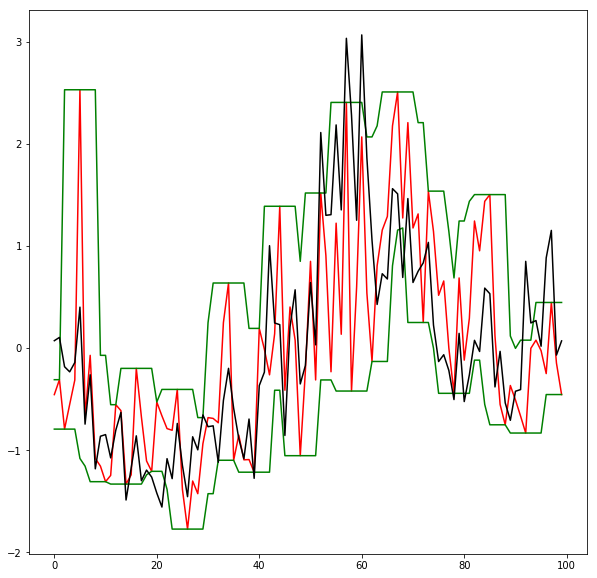

LB_Keogh similarity:  1.80627176177893


In [159]:
numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = g[:2,:sz]
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

plt.figure()

envelope_down, envelope_up = metrics.lb_envelope(dataset_scaled[0], radius=3)
plt.plot(numpy.arange(sz), dataset_scaled[0, :, 0], "r-")
plt.plot(numpy.arange(sz), envelope_down[:, 0], "g-")
plt.plot(numpy.arange(sz), envelope_up[:, 0], "g-")
plt.plot(numpy.arange(sz), dataset_scaled[1, :, 0], "k-")

plt.rcParams['figure.figsize'] = (0.9, 0.9)
plt.show()

print("LB_Keogh similarity: ", metrics.lb_keogh(dataset_scaled[1],
                                                envelope_candidate=(envelope_down, envelope_up)))

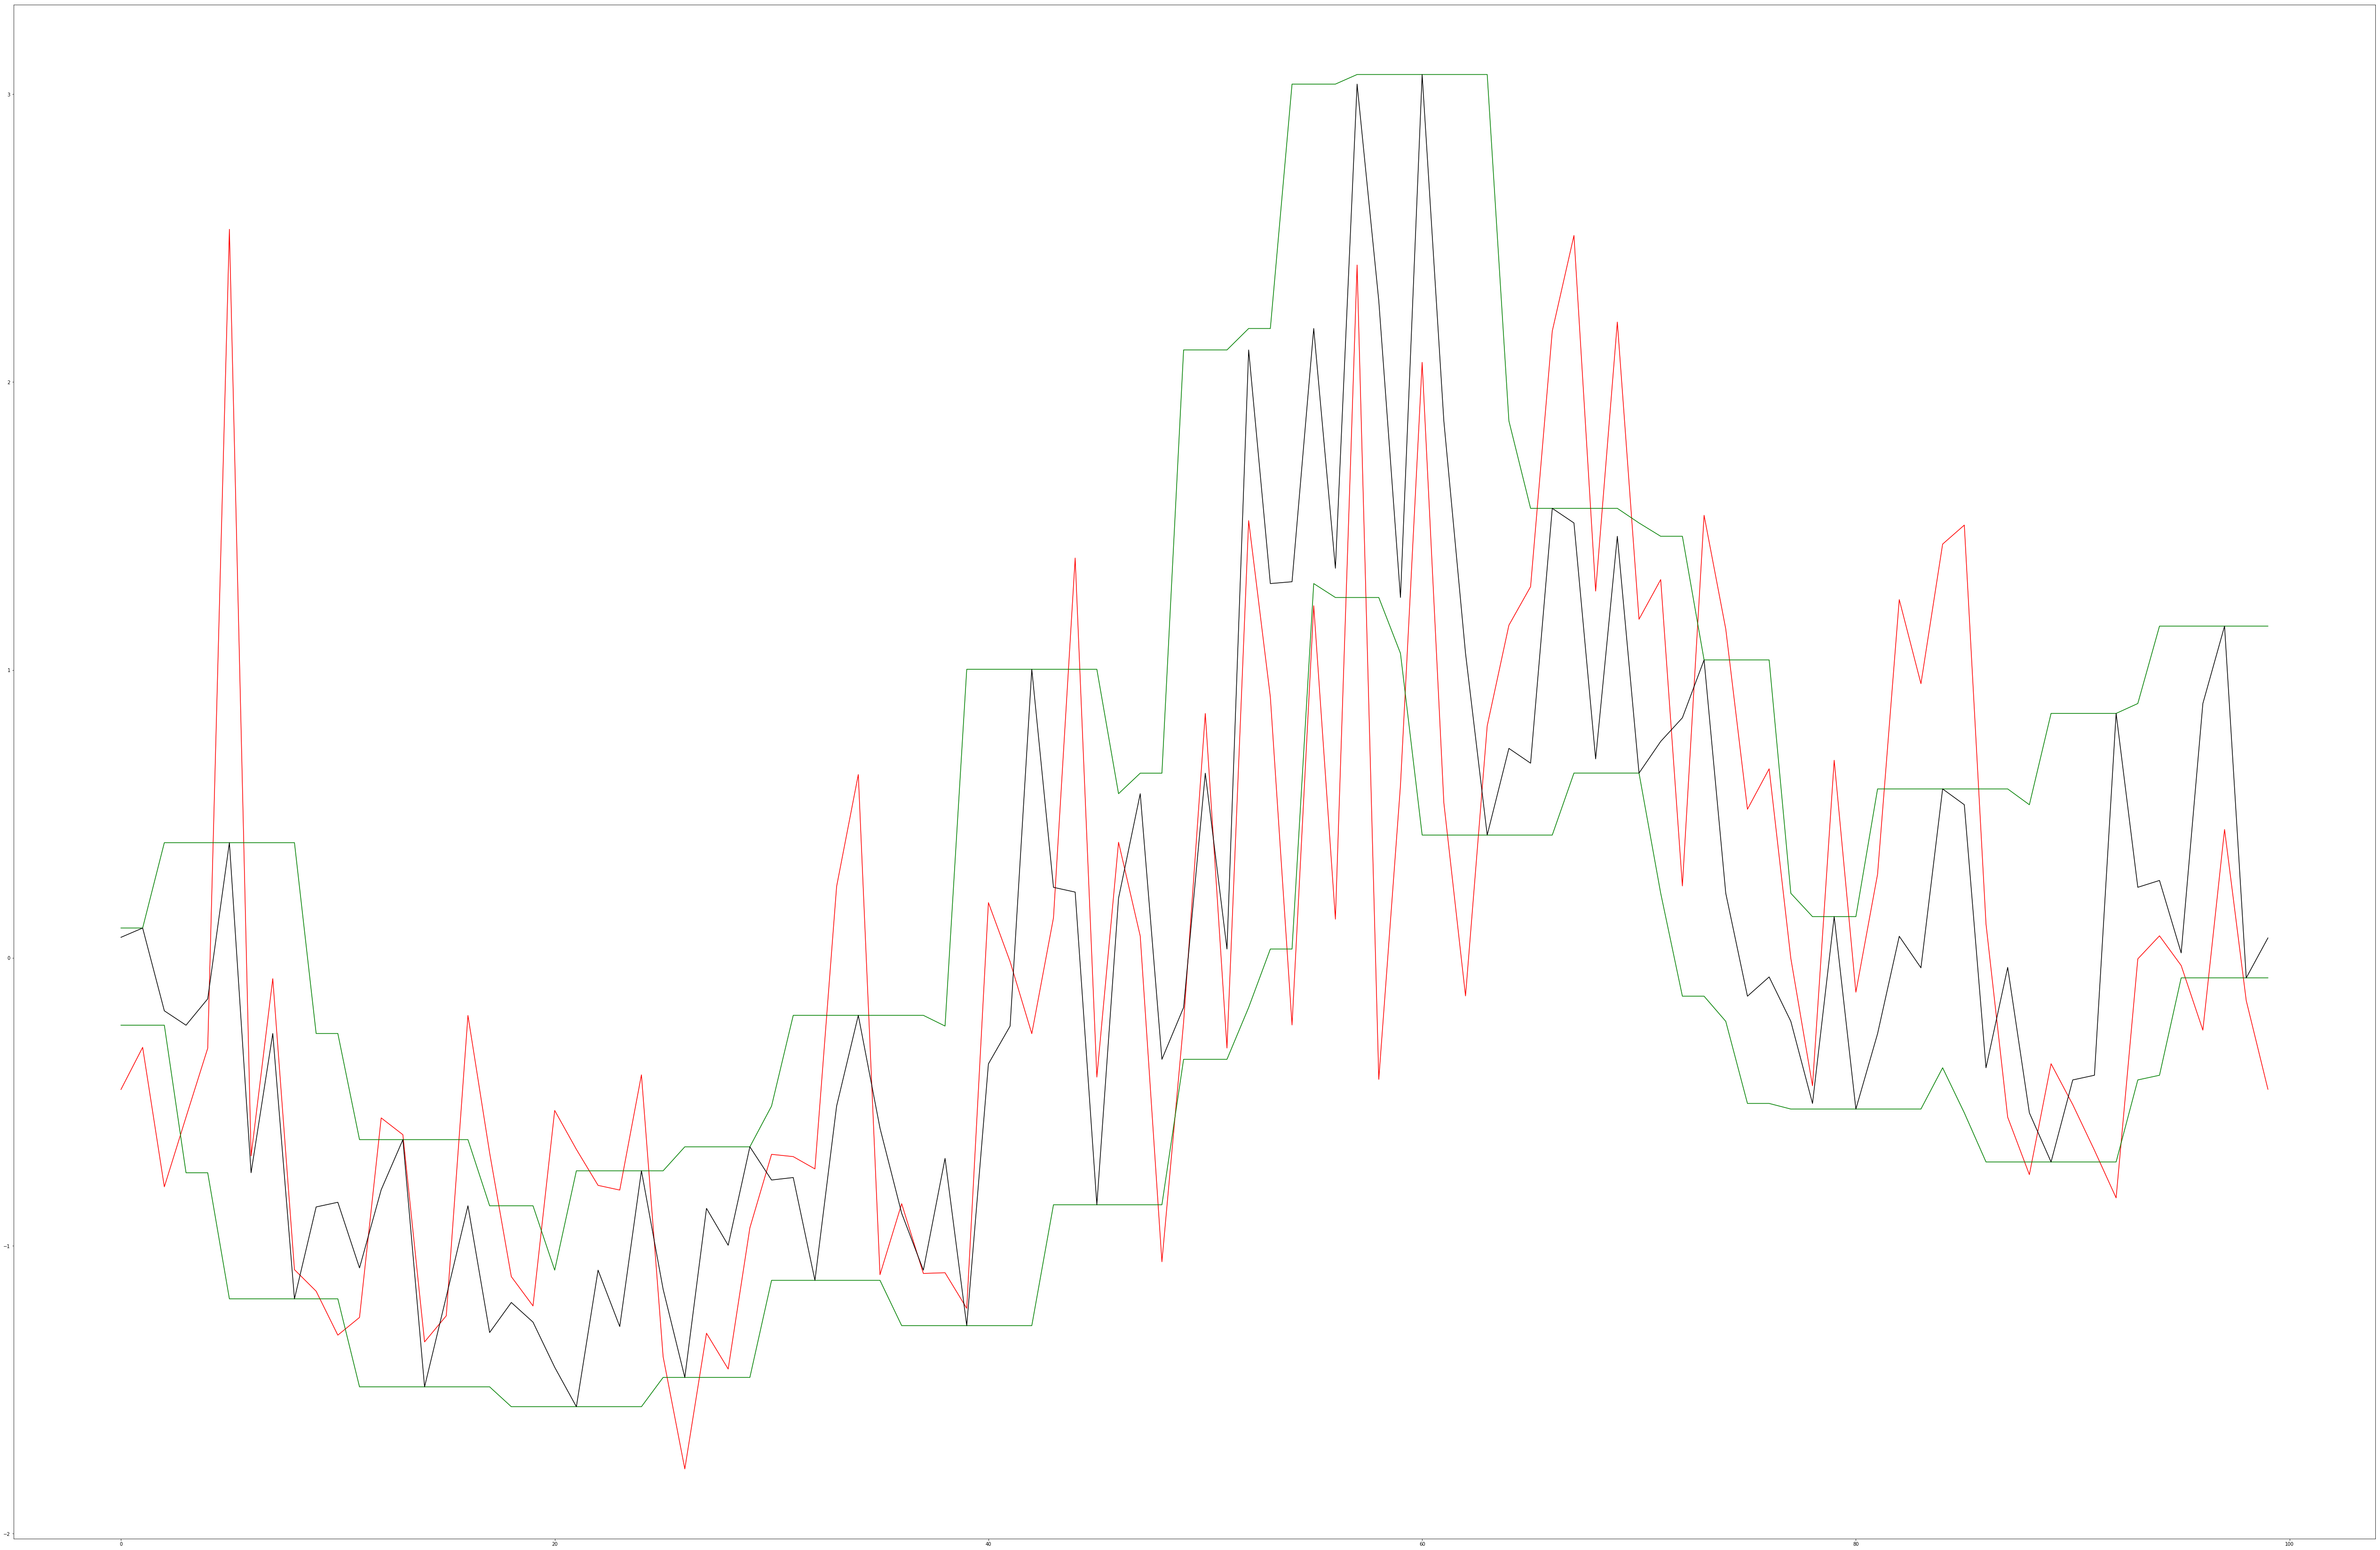

LB_Keogh similarity:  4.000437841054112


In [113]:
numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = g[:2,:sz]

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

plt.figure()

envelope_down, envelope_up = metrics.lb_envelope(dataset_scaled[1], radius=3)
plt.plot(numpy.arange(sz), dataset_scaled[0, :, 0], "r-")
plt.plot(numpy.arange(sz), envelope_down[:, 0], "g-")
plt.plot(numpy.arange(sz), envelope_up[:, 0], "g-")
plt.plot(numpy.arange(sz), dataset_scaled[1, :, 0], "k-")

plt.rcParams['figure.figsize'] = (90, 60)
plt.show()

print("LB_Keogh similarity: ", metrics.lb_keogh(dataset_scaled[0],
                                                envelope_candidate=(envelope_down, envelope_up)))

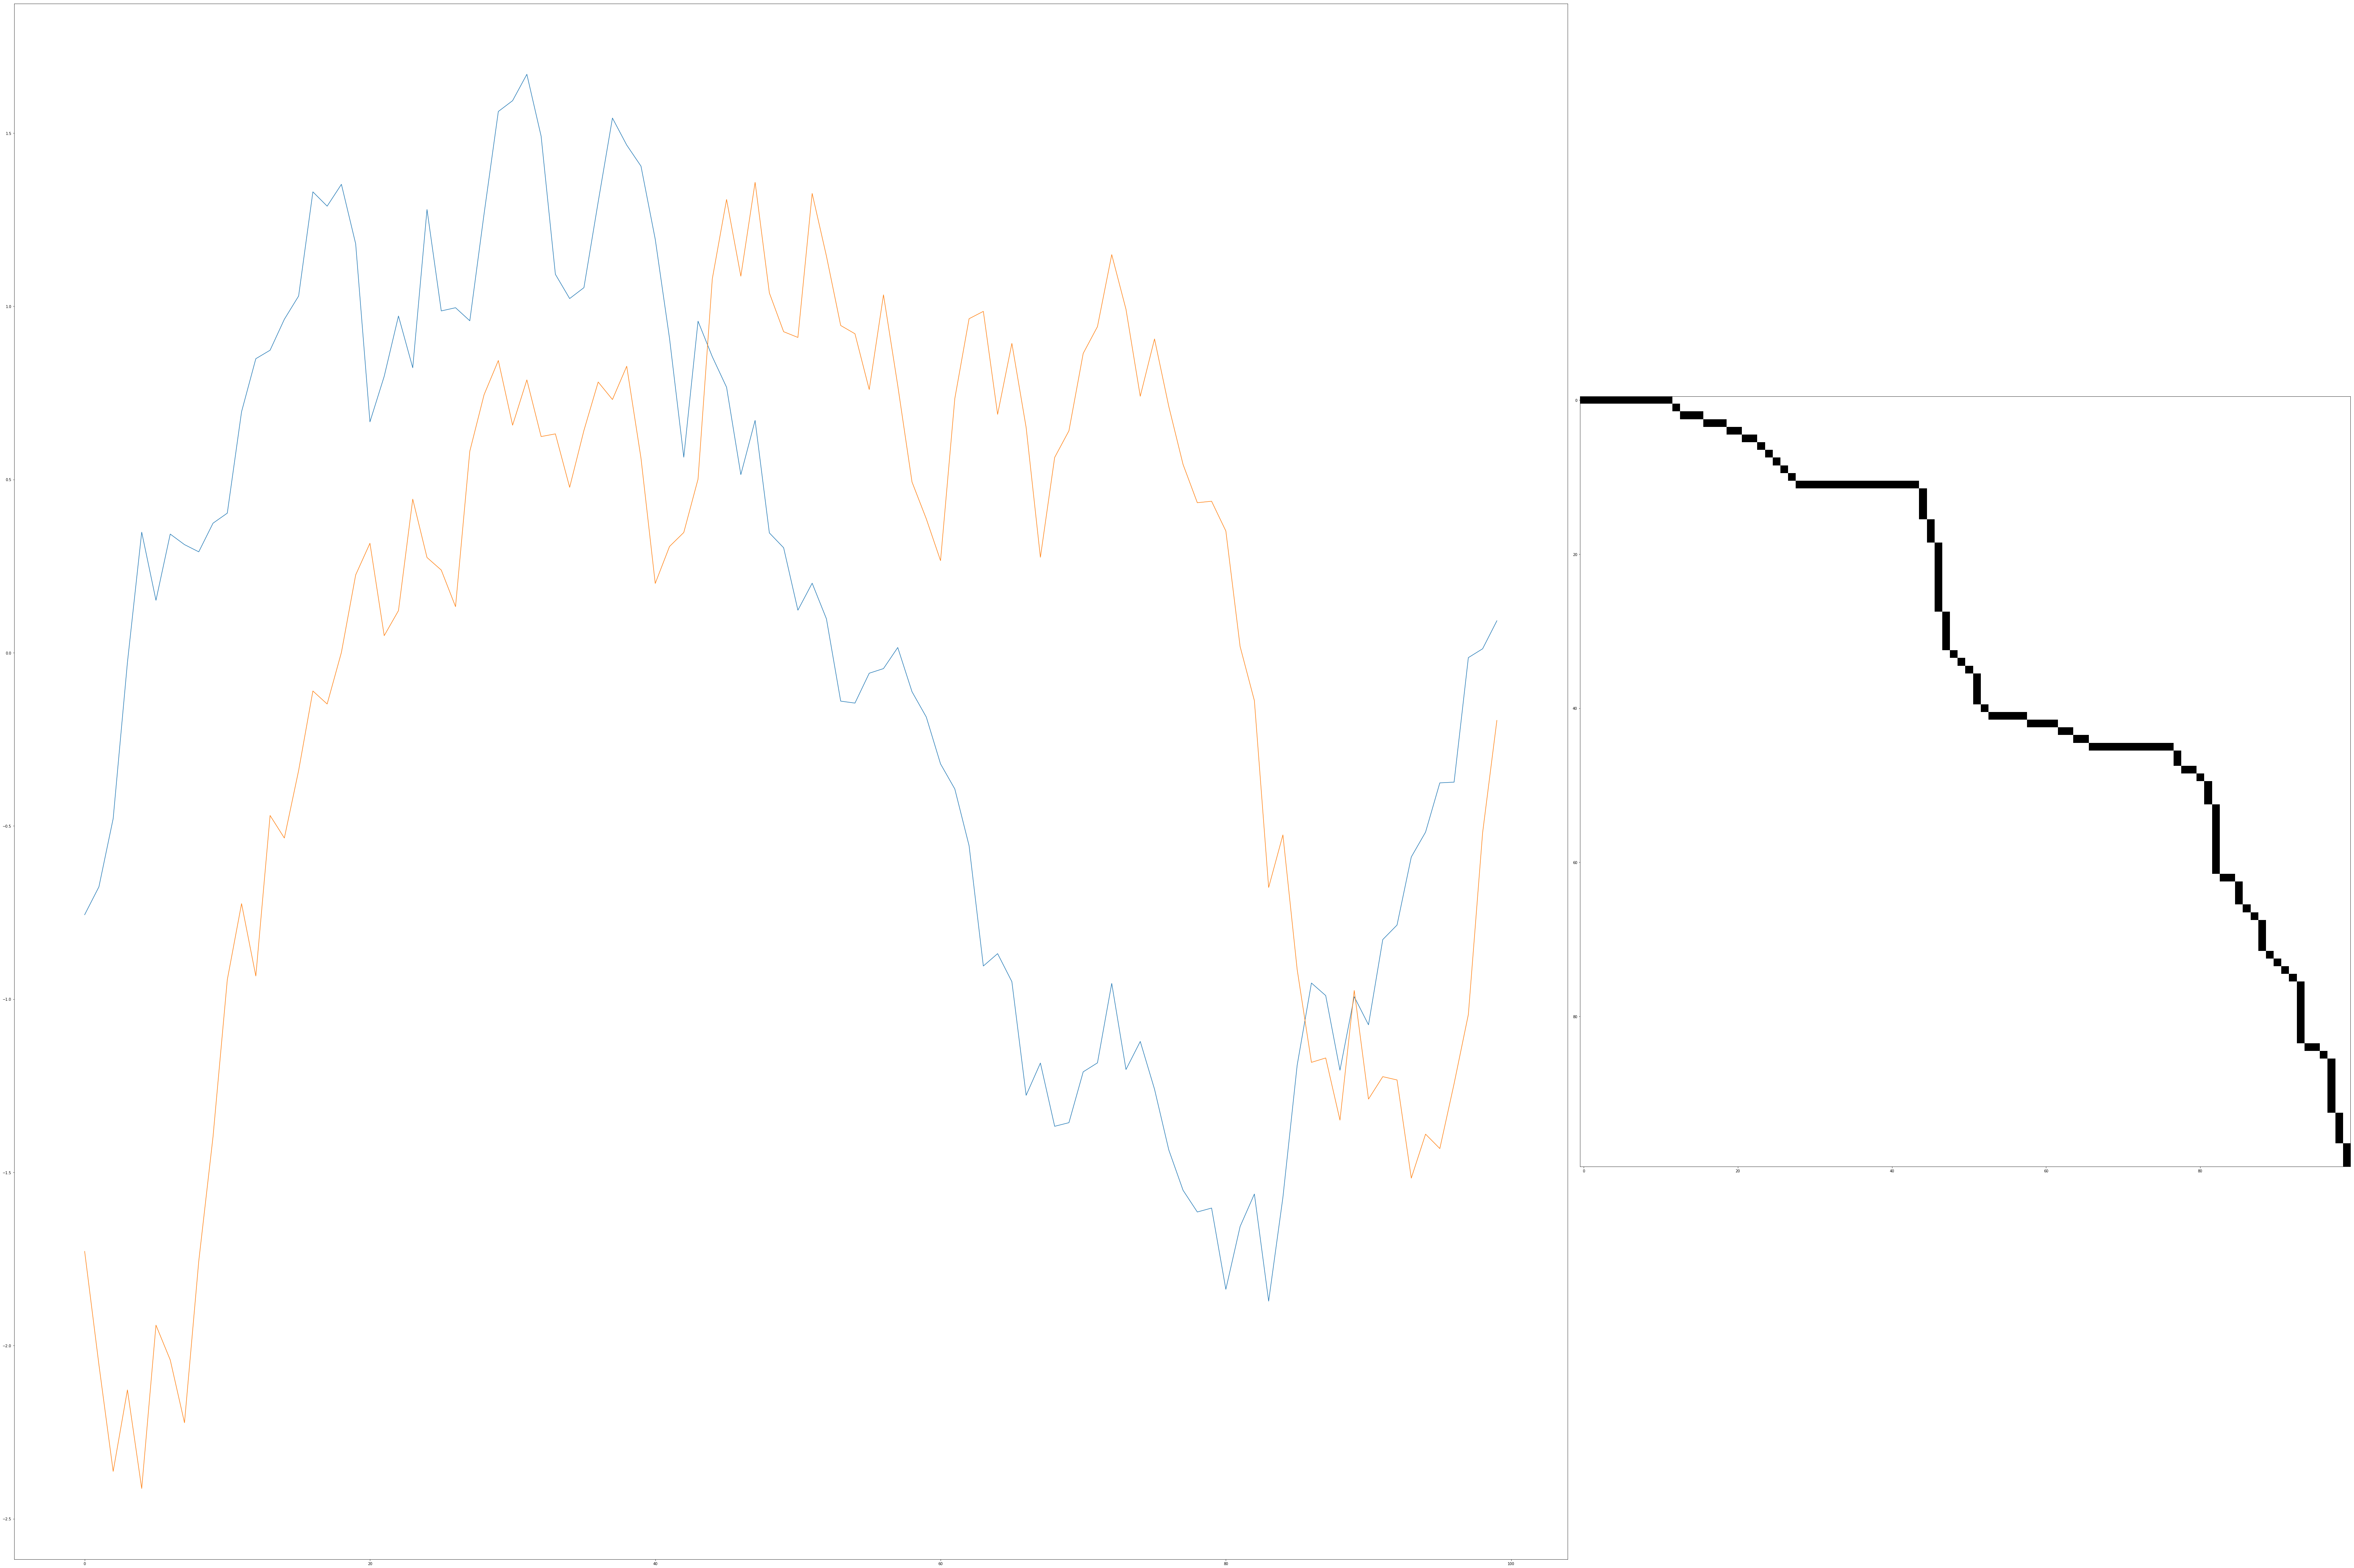

In [114]:
numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

path, sim = metrics.dtw_path(dataset_scaled[0], dataset_scaled[1])

matrix_path = numpy.zeros((sz, sz), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1

plt.figure()

plt.subplot2grid((1, 3), (0, 0), colspan=2)
plt.plot(numpy.arange(sz), dataset_scaled[0, :, 0])
plt.plot(numpy.arange(sz), dataset_scaled[1, :, 0])
plt.subplot(1, 3, 3)
plt.imshow(matrix_path, cmap="gray_r")

plt.tight_layout()
plt.show()

In [115]:
sim

4.485257265545512

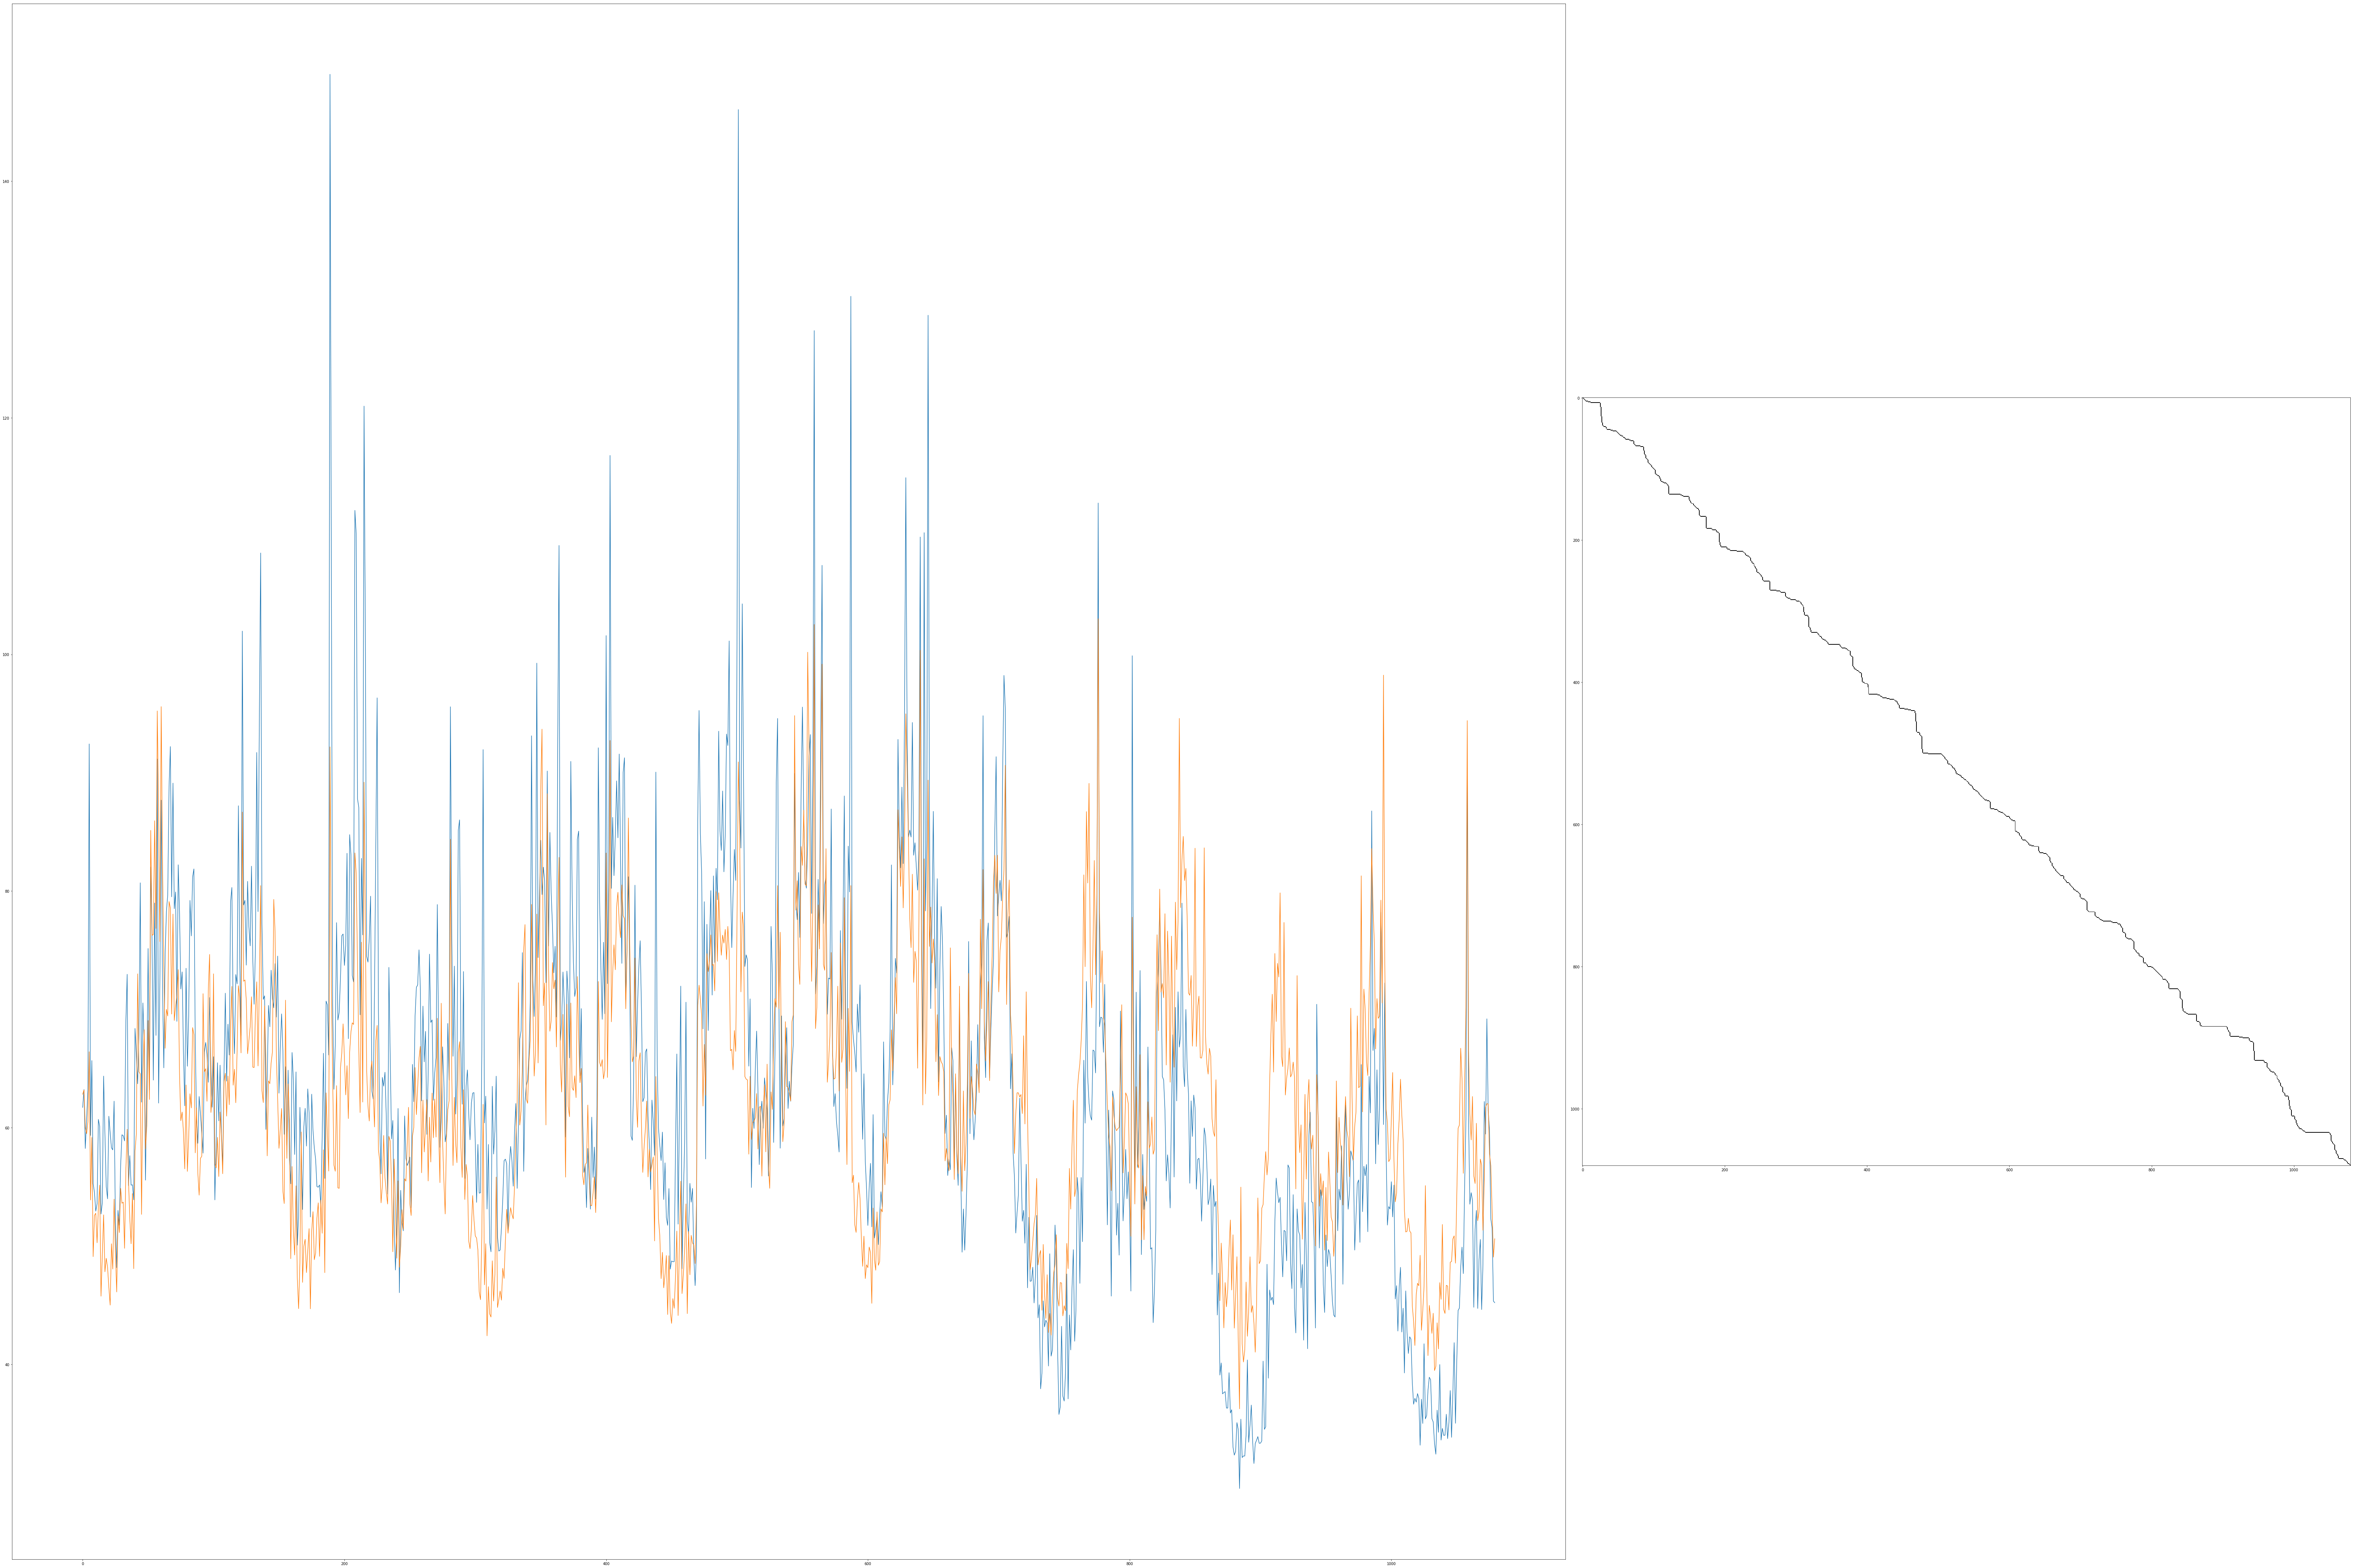

In [129]:
numpy.random.seed(0)
n_ts, sz, d = 2, 1080, 1
dataset = g[:2,:]
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = np.expand_dims(dataset, -1)#scaler.fit_transform(dataset)

path, sim = metrics.dtw_path(dataset_scaled[1], dataset_scaled[0])

matrix_path = numpy.zeros((sz, sz), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1

plt.figure()

plt.subplot2grid((1, 3), (0, 0), colspan=2)
plt.plot(numpy.arange(sz), dataset_scaled[0, :, 0])
plt.plot(numpy.arange(sz), dataset_scaled[1, :, 0])
plt.subplot(1, 3, 3)
plt.imshow(matrix_path, cmap="gray_r")

plt.tight_layout()
plt.show()

In [130]:
sim

222.86531145317028